Author : Nicolas Rousset  
Github : https://github.com/Aenori  
Mail : nrousset@gmail.com  
License : MIT  

# Pandas presentation

Pandas is the main tools for data analysis of heterogeneous data manipulation.  
It uses mainly two objects :  
- a DataFrame, that is like an excel sheet  
- a Series, that is a column  

With a database flavour (data are indexed), but let's have a look about it.

In [1]:
import pandas as pd

## Loading the data

You can ask panda to load data from a local file,from an URL address or a lot of other data source

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Aenori/20221024_public/main/dataset/titanic_train.csv', 
                     index_col=0)

Also note that pandas can read a lot more format than csv !

In [3]:
for it in dir(pd):
    if it.startswith('read'):
        print(it)

read_clipboard
read_csv
read_excel
read_feather
read_fwf
read_gbq
read_hdf
read_html
read_json
read_orc
read_parquet
read_pickle
read_sas
read_spss
read_sql
read_sql_query
read_sql_table
read_stata
read_table
read_xml


## High level overview

Once the Dataframe is loaded, pandas provide a lot of function to have an overview of the data set

### 1. Getting a global description of the Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 2. Getting the size of the dataframe

In [5]:
df.shape

(891, 11)

### 3. Getting the list of the columns

In [6]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 4. Getting a statistical overview of the numerical columns

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


count give you the number of valid entry. Unvalid entries are recorded as na (not available)

In [8]:
df['Age'].isna().any()

True

In [9]:
df['Fare'].isna().any()

False

### 5. Getting an overview of textual columns

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### 6. Getting an histogram of numerical columns 

<AxesSubplot:>

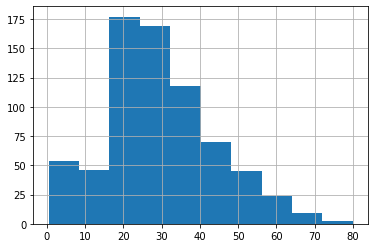

In [12]:
df['Age'].hist()

You can also plot the columns

<AxesSubplot:xlabel='PassengerId'>

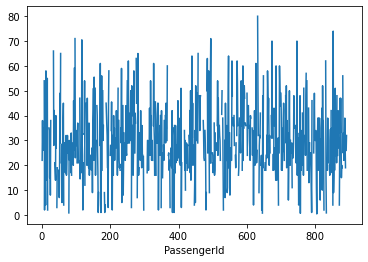

In [13]:
df['Age'].plot()

Obviously ploting here doesn't make much sense as the dataframe is sorted by passengerId, which is not revelant

### 7. Getting numerical columns correlation

In [14]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
